# Exercises

1. Experiment with the number of hidden neurons in our simple neural network
model, as well as the learning rate.
* What changes result in more linear output from the model?
* Can you get the model to obviously overfit the data?

In [1]:
# Importing all the neccesary data
import torch
from torch import nn
from torch.nn import Sequential
import torch.optim as optim

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 8,  4,  3,  1,  6, 10,  7,  9,  0]), tensor([2, 5]))

In [4]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [5]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) 
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()
        if epoch == 1 or epoch % 1 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

a) To get more Linear response from our model a good idea is to change an activation function to be more linear.

In [6]:

seq_model = Sequential(nn.Linear(1,128),nn.ReLU(),nn.Linear(128,1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,
loss_fn = nn.MSELoss(),
t_u_train = train_t_un,
t_u_val = val_t_un,
t_c_train = train_t_c,
t_c_val = val_t_c)


Epoch 1, Training loss 200.5147, Validation loss 148.4081
Epoch 2, Training loss 36.4900, Validation loss 11.3434
Epoch 3, Training loss 34.1719, Validation loss 6.6198
Epoch 4, Training loss 33.8593, Validation loss 6.8931
Epoch 5, Training loss 33.5834, Validation loss 6.8097
Epoch 6, Training loss 33.3092, Validation loss 6.7737
Epoch 7, Training loss 33.0370, Validation loss 6.7318
Epoch 8, Training loss 32.7666, Validation loss 6.6912
Epoch 9, Training loss 32.4981, Validation loss 6.6507
Epoch 10, Training loss 32.2315, Validation loss 6.6101
Epoch 11, Training loss 31.9667, Validation loss 6.5706
Epoch 12, Training loss 31.7037, Validation loss 6.5315
Epoch 13, Training loss 31.4424, Validation loss 6.4927
Epoch 14, Training loss 31.1837, Validation loss 6.4539
Epoch 15, Training loss 30.9284, Validation loss 6.4155
Epoch 16, Training loss 30.6750, Validation loss 6.3776
Epoch 17, Training loss 30.4243, Validation loss 6.3395
Epoch 18, Training loss 30.1755, Validation loss 6.30

b) To make our model overfit we might try to make it very complicated and so it trains a lot on our one dataset, another idea is to make training set smaller

In [7]:
seq_model = Sequential(nn.Linear(1,13),nn.Sigmoid(),nn.Linear(13,128),nn.ReLU(),nn.Linear(128,13),nn.Hardtanh(),nn.Linear(13,1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,
loss_fn = nn.MSELoss(),
t_u_train = train_t_un,
t_u_val = val_t_un,
t_c_train = train_t_c,
t_c_val = val_t_c)

Epoch 1, Training loss 202.1681, Validation loss 150.2879
Epoch 2, Training loss 200.0874, Validation loss 147.9906
Epoch 3, Training loss 198.0936, Validation loss 145.7875
Epoch 4, Training loss 196.1470, Validation loss 143.6350
Epoch 5, Training loss 194.2120, Validation loss 141.4940
Epoch 6, Training loss 192.2559, Validation loss 139.3288
Epoch 7, Training loss 190.2484, Validation loss 137.1053
Epoch 8, Training loss 188.1588, Validation loss 134.7903
Epoch 9, Training loss 185.9571, Validation loss 132.3504
Epoch 10, Training loss 183.6149, Validation loss 129.7545
Epoch 11, Training loss 181.0997, Validation loss 126.9660
Epoch 12, Training loss 178.3771, Validation loss 123.9467
Epoch 13, Training loss 175.4133, Validation loss 120.6585
Epoch 14, Training loss 172.1735, Validation loss 117.0628
Epoch 15, Training loss 168.6226, Validation loss 113.1200
Epoch 16, Training loss 164.7270, Validation loss 108.7914
Epoch 17, Training loss 161.4200, Validation loss 104.7959
Epoch 

The third-hardest problem in physics is finding a proper wine to celebrate dis-
coveries. Load the wine data from chapter 4, and create a new model with the
appropriate number of input parameters.
* How long does it take to train compared to the temperature data we have
been using?
* Can you explain what factors contribute to the training times?
* Can you get the loss to decrease while training on this dataset?
* How would you go about graphing this dataset?

In [8]:
import numpy as np
wine_path = 'winequality-white.csv'
wine = np.loadtxt(wine_path,skiprows=1,delimiter=";",dtype=np.float32)


In [9]:
dataset = torch.from_numpy(wine)

In [10]:
target = dataset[:,-1]
target

tensor([6., 6., 6.,  ..., 6., 7., 6.])

In [11]:
sulfur = dataset[:,0:-1]
sulfur

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

In [12]:
n_samples = target.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([4040, 4013,  383,  ..., 1455, 4756, 3478]),
 tensor([1337, 1521, 3646, 1380,  418,  314, 4033, 4450, 3164, 4173, 2840, 2961,
         1338, 4165, 2014, 2991, 2616, 3273, 2342, 3447, 3370, 1291, 3491,  614,
           39, 3461, 1511, 3361, 3835, 1727, 1445, 2999, 3597, 2748,  627, 4736,
          642, 1868, 2703, 3867, 1755,  692,  124, 3732, 1858, 3158, 3637,  980,
         3806,  151,  847, 4125, 3565, 1592,  113, 2894, 3809, 3139, 1153, 1882,
           74, 1789, 3815,  133, 4738, 3931, 2799, 3534, 1464, 2089, 1241, 2560,
         2194, 1196, 3566, 4019, 3930, 2815, 3710, 4276,  368, 2320, 3951, 2473,
         4814, 3976,  857, 3003, 1928, 1128, 3047, 4700, 2733, 3616,  700, 1224,
         3837,  556,  530, 2634, 1401, 4644,  489, 3114, 3203, 4719, 3397, 1339,
         3942, 4849, 1001, 2525, 4002, 4623,  392,  291, 2648, 1628, 2652, 3132,
         2830, 2150, 2040, 4444, 4241, 2858,  757, 4400, 4837, 1354, 3764, 4330,
         4684, 1045, 2512, 1080,  226, 2151, 2094, 4702,

In [14]:
from sklearn.preprocessing import StandardScaler


train_target = target[train_indices]
train_sulfur = sulfur[train_indices]
val_target = target[val_indices]
val_sulfur = sulfur[val_indices]
scaler = StandardScaler()
train_sulfur = scaler.fit_transform(train_sulfur)
val_sulfur = scaler.transform(val_sulfur)

# Convert to PyTorch tensors
train_sulfur = torch.tensor(train_sulfur, dtype=torch.float32)
val_sulfur = torch.tensor(val_sulfur, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32).view(-1, 1)
val_target = torch.tensor(val_target, dtype=torch.float32).view(-1, 1)

# Define the neural network using nn.Sequential
model = nn.Sequential(
    nn.Linear(train_sulfur.shape[1], 128),  # Assuming train_sulfur has the correct shape
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Print the model architecture
print(model)

# Define the loss function and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# Define the training loop
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        model.train()
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
        
        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

# Train the model
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    t_u_train=train_sulfur,
    t_u_val=val_sulfur,
    t_c_train=train_target,
    t_c_val=val_target
)


/tmp/ipykernel_27627/1078301511.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_target = torch.tensor(train_target, dtype=torch.float32).view(-1, 1)
/tmp/ipykernel_27627/1078301511.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_target = torch.tensor(val_target, dtype=torch.float32).view(-1, 1)


Sequential(
  (0): Linear(in_features=11, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 1, Training loss 33.3811, Validation loss 33.0791
Epoch 500, Training loss 2.5881, Validation loss 2.7978
Epoch 1000, Training loss 1.7133, Validation loss 1.8377
Epoch 1500, Training loss 0.9327, Validation loss 0.9912
Epoch 2000, Training loss 0.5676, Validation loss 0.5810
Epoch 2500, Training loss 0.4856, Validation loss 0.4769
Epoch 3000, Training loss 0.4560, Validation loss 0.4526
Epoch 3500, Training loss 0.4314, Validation loss 0.4420
Epoch 4000, Training loss 0.4078, Validation loss 0.4324
Epoch 4500, Training loss 0.3846, Validation loss 0.4265
Epoch 5000, Training loss 0.3621, Validation loss 0.4241


<Axes: >

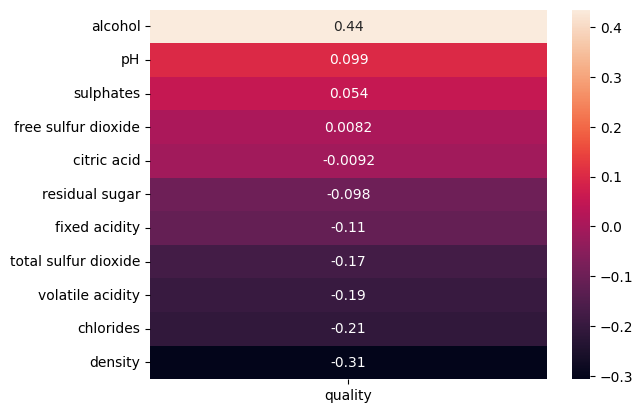

In [48]:
import seaborn as sns
import pandas as pd
wine_path = 'winequality-white.csv'
wine = pd.read_csv(wine_path,delimiter=";")
corr = wine.corr()
corr = corr[["quality"]].sort_values(by="quality",ascending=False)[1:]
sns.heatmap(corr,annot=True)